<h1> Visualisasi Data Time Series dan Analisa Statistik Covid-19 </h1>

Bagian 1. Data covid-19 se-Indonesia (Pengantar awal)
<ul>
    <li>analisa statistik deskriptif</li>
    <li>visualisasi heatmap corelation</li>
</ul>

Bagian 2. Data covid-19 se-Indonesia (Visualisasi untuk pengantar analisa statistik dan EDA)
<ul>
    <li>agregasi data</li>
    <li>visualisasi time series	(pergerakan data dari waktu ke waktu)</li>
    <li>visualisasi scatter plot (linieritas antar variabel)</li>
</ul>

Bagian 3. Data covid-19 per-Provinsi
<ul>
    <li>visualisasi pie chart</li>
    <li>visualisasi barplot</li>
</ul>

Sumber data: [Satgas Penanganan Covid-19 Republik Indonesia](https://bnpb-inacovid19.hub.arcgis.com/search?collection=Dataset "InaCOVID-19") (* Update 20 Oktober 2020)

### Input dataset time series covid-19 Indonesia

In [1]:
from ipynb.fs.full.class_visualisasi import *

In [2]:
# ket. data sudah di pra-proses (seleksi fitur dan reduksi dimensi)
# cara pra-proses akan dibahas pada pertemuan 4

# load dataset
import pandas as pd
df_indo = pd.read_excel("D:/Materi Kuliah - Machine Learning v1/dataset/dataset_covid.xlsx", sheet_name="data covid indonesia")
df_indo = df_indo.set_index("tanggal")

# informasi dataset
df_indo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 232 entries, 2020-03-02 to 2020-10-19
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   positif_kumulatif     232 non-null    int64  
 1   sembuh_kumulatif      232 non-null    int64  
 2   meninggal_kumulatif   232 non-null    int64  
 3   positif_harian        232 non-null    int64  
 4   sembuh_harian         232 non-null    int64  
 5   meninggal_harian      232 non-null    int64  
 6   perawatan_kumulatif   232 non-null    int64  
 7   perawatan_harian      232 non-null    int64  
 8   persentase_sembuh     232 non-null    float64
 9   persentase_meninggal  232 non-null    float64
dtypes: float64(2), int64(8)
memory usage: 19.9 KB


In [3]:
# melihat dataset
df_indo

,positif_kumulatif,sembuh_kumulatif,meninggal_kumulatif,positif_harian,sembuh_harian,meninggal_harian,perawatan_kumulatif,perawatan_harian,persentase_sembuh,persentase_meninggal
tanggal,,,,,,,,,,
2020-03-02,2,0,0,2,0,0,2,2,0.000000,0.000000
2020-03-03,2,0,0,0,0,0,2,0,0.000000,0.000000
2020-03-04,2,0,0,0,0,0,2,0,0.000000,0.000000
2020-03-05,2,0,0,0,0,0,2,0,0.000000,0.000000
2020-03-06,4,0,0,2,0,0,4,2,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
2020-10-15,349160,273661,12268,4411,5810,112,63231,-1511,78.376962,3.513575
2020-10-16,353461,277544,12347,4301,3883,79,63570,339,78.521817,3.493172
2020-10-17,357762,281592,12431,4301,4048,84,63739,169,78.709310,3.474656


### Bagian 1 analisa statistik deskriptif sederhana.
1. Menghitung jumlah positif, sembuh dan meninggal di Indonesia
2. Menghitung persentase sembuh dan meninggal 
3. Menghitung korelasi dan signifikansi positif dengan sembuh dan positif dengan meninggal jika dilihat dari pergerakan data secara time series \
(update 20 Oktober 2020)

In [4]:
# Menghitung jumlah positif, sembuh dan meninggal di Indonesia
# Cara manualnya adalah menjumlahkan data harian positif, sembuh dan meninggal
# Cara otomatisasinya adalah meninggunakan fungsi sum()

print("Jumlah Positif \t\t: " + " {:,} ".format(df_indo["positif_harian"].sum()) + "orang")
print("Jumlah Sembuh \t\t: " + " {:,} ".format(df_indo["sembuh_harian"].sum()) + "orang")
print("Jumlah Meninggal \t: " + " {:,} ".format(df_indo["meninggal_harian"].sum()) + "orang")

Jumlah Positif 		:  365,240 orang
Jumlah Sembuh 		:  289,243 orang
Jumlah Meninggal 	:  12,617 orang


In [5]:
# Menghitung persentase sembuh dan meninggal
# kumulatif sembuh / kumulatif positif * 100%
# kumulatif meninggal / kumulatif positif * 100%

persentase_sembuh = (df_indo["sembuh_harian"].sum() / df_indo["positif_harian"].sum())*100
persentase_meninggal = (df_indo["meninggal_harian"].sum() / df_indo["positif_harian"].sum())*100

print("Persentase sembuh \t: " +"{:.2f} ".format(persentase_sembuh)+ "%")
print("Persentase meninggal \t: " +"{:.2f} ".format(persentase_meninggal)+ "%")

Persentase sembuh 	: 79.19 %
Persentase meninggal 	: 3.45 %


In [6]:
# Menghitung korelasi dan signifikansi positif dengan sembuh dan positif dengan meninggal jika dilihat dari pergerakan data secara time series.
# Terdapat beberapa metode korelasi seperti Uji-Kontingensi, Uji-Phi, Uji-Spearman Rank, Uji-Kendall, Uji-Pearson.
# 1. Uji-Kontingensi adalah korelasi dengna skala nominal dan bersifat non-parametrik.
# 2. Uji-Phi adalah korelasi dengna skala nominal dan bersifat non-parametrik. Korelasi ini umumnya untuk data-data dikotomik.
# 3. Uji-Spearman Rank adalah korelasi dengan skala ordinal dan bersifat non-parametrik.
# 4. Uji-Kendall adalah korelasi dengan skala ordinal dan bersifat non-parametrik.
# 5. Uji-Pearson adalah korelasi dengan skala interval dan bersifat parametrik. Dimana datanya akan continue
# Karena data covid berskala interval dan berisifat parametrik sehingga metode yang cocok adalah uji-pearson.

# Memanggil fungsi pearsonr(x, y). Dimana r adalah nilai korelasi dan p adalah nilai signifikansi
r1, p1 = sc.pearsonr(df_indo["positif_harian"], df_indo["sembuh_harian"])
r2, p2 = sc.pearsonr(df_indo["positif_harian"], df_indo["meninggal_harian"])

print("korelasi positif harian dengan sembuh harian adalah" +" {:.4f} ".format(r1)+ "dengan signifikansi" +" {:.4f} ".format(p1))
print("korelasi positif harian dengan meninggal harian adalah" +" {:.4f} ".format(r2)+ "dengan signifikansi" +" {:.4f} ".format(p2))

# Diketahui bahwa uji korelasi bersifat kuat dan berpengaruh secara nyata.

korelasi positif harian dengan sembuh harian adalah 0.9495 dengan signifikansi 0.0000 
korelasi positif harian dengan meninggal harian adalah 0.8895 dengan signifikansi 0.0000 


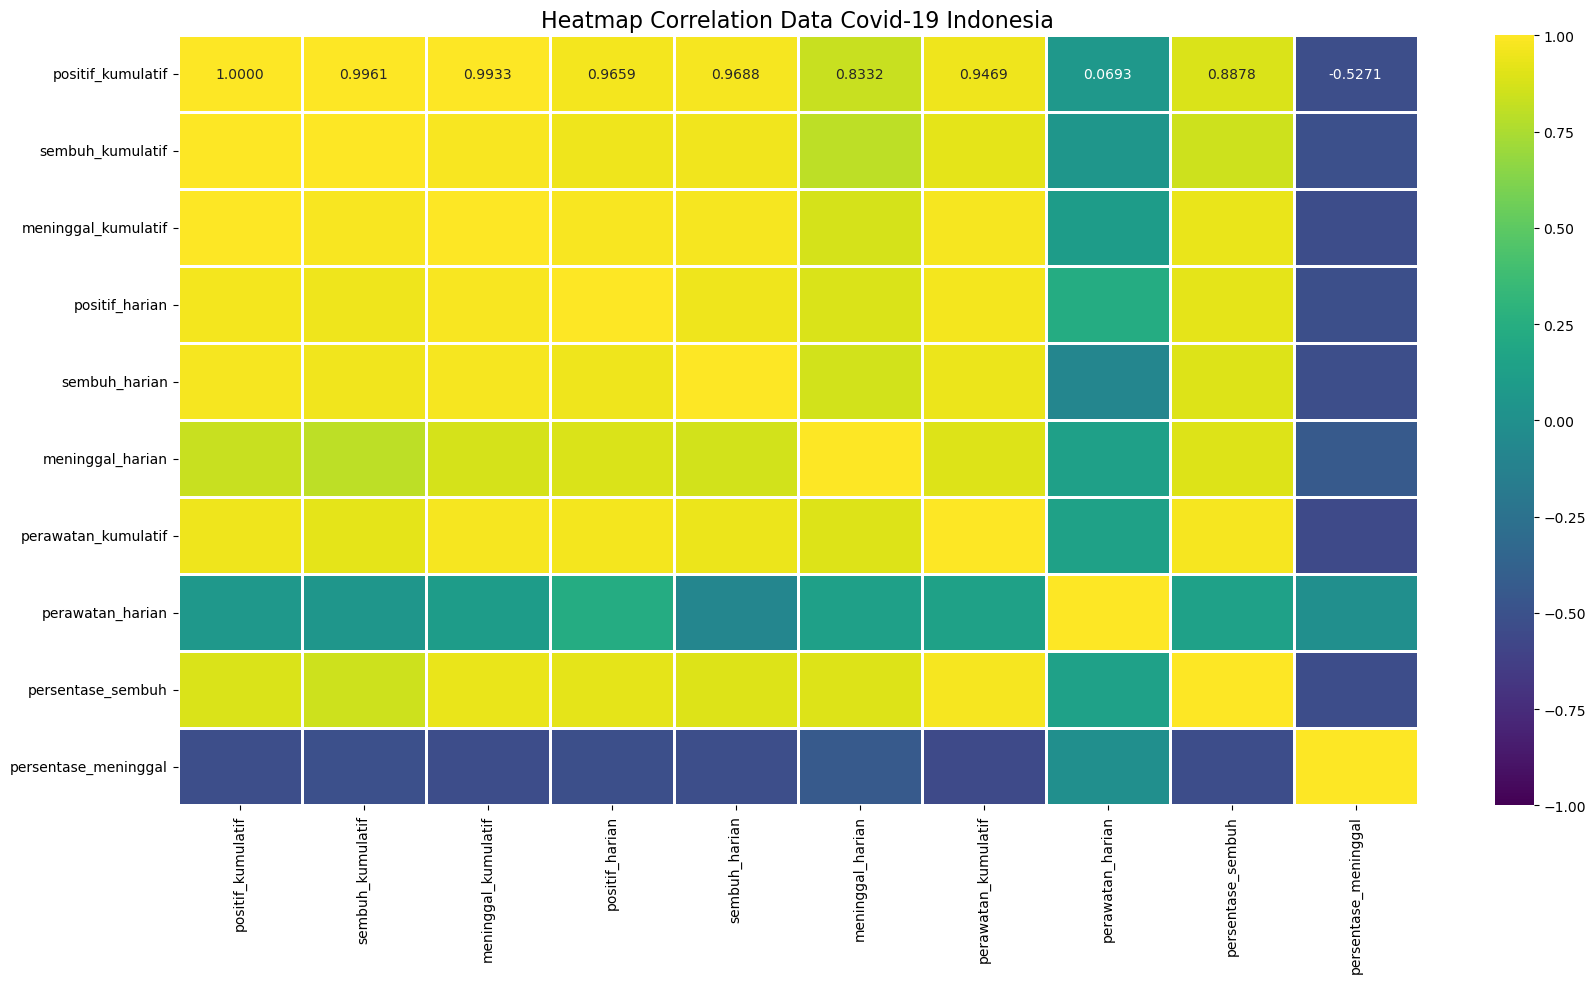

In [7]:
### Membuat heatmap untuk menampilkan hasil korelasi
visual_heatmap(df_indo, "pearson")

## Bagian 2.1 Visualisasi Data Dengan Teknik Aggregasi Data

In [8]:
# Membuat plot time series covid-19 berdasarkan data bulanan
# Memisahkan variabel-variabel yang digunakan
df = df_indo.iloc[:, 3:6]

# Menampilkan hasil index data berdasarkan tanggal
df

,positif_harian,sembuh_harian,meninggal_harian
tanggal,,,
2020-03-02,2,0,0
2020-03-03,0,0,0
2020-03-04,0,0,0
2020-03-05,0,0,0
2020-03-06,2,0,0
...,...,...,...
2020-10-15,4411,5810,112
2020-10-16,4301,3883,79
2020-10-17,4301,4048,84


In [9]:
# proses aggregasi ke data bulanan
df_bulanan = df.resample('M').sum()
df_bulanan

,positif_harian,sembuh_harian,meninggal_harian
tanggal,,,
2020-03-31,1528,81,136
2020-04-30,8590,1441,656
2020-05-31,16355,5786,821
2020-06-30,29912,17498,1263
2020-07-31,51991,41101,2255
2020-08-31,66420,60052,2286
2020-09-30,112212,88988,3323
2020-10-31,78232,74296,1877


Jika diamati seksama, maka dataset menjadi lebih sederhana. Tanpa menghilangkan karakteristik data awal

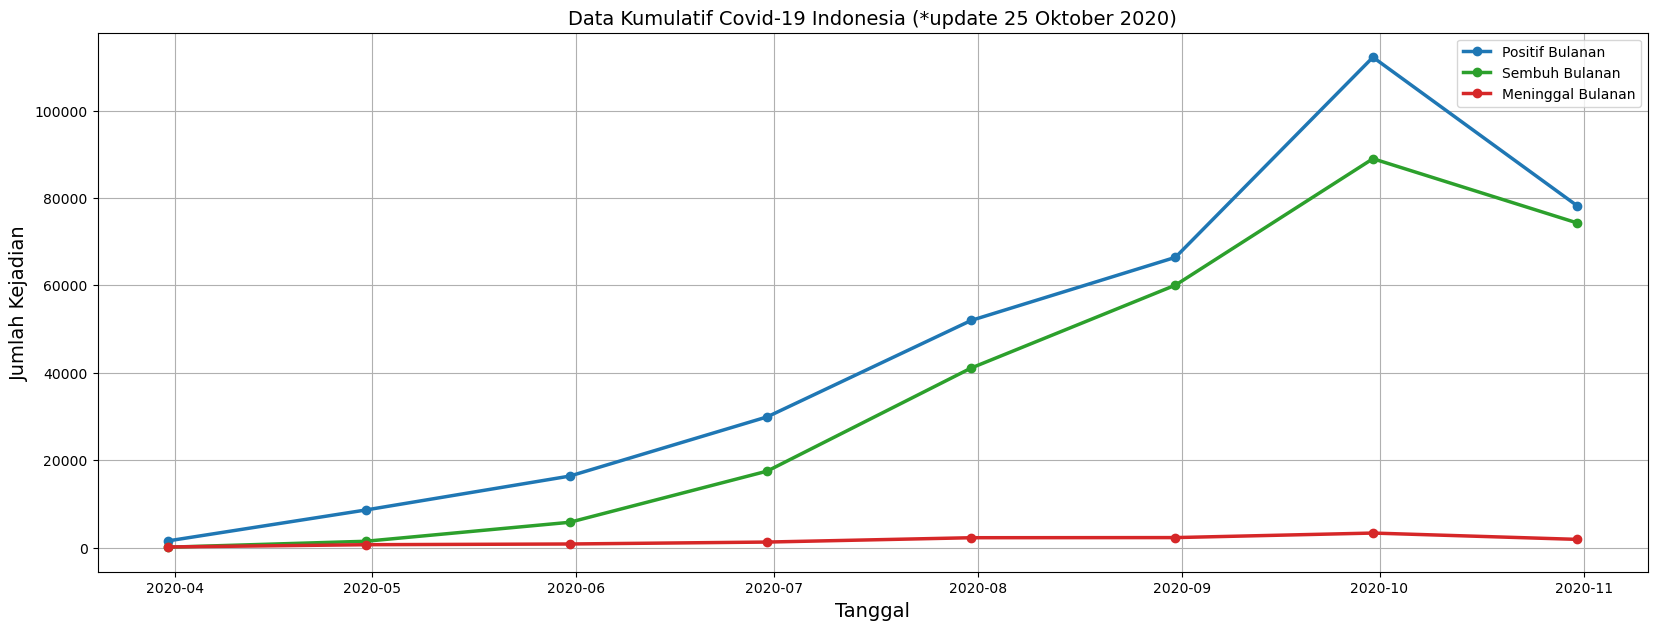

In [10]:
# penetapan parameter
nm_color = ["blue", "green", "red"]
nm_marker = "o"
nm_label = ["Positif Bulanan", "Sembuh Bulanan", "Meninggal Bulanan"]
nm_xlabel = "Tanggal"
nm_ylabel = "Jumlah Kejadian"
nm_title = "Data Kumulatif Covid-19 Indonesia (*update 25 Oktober 2020)"

# Menampilkan plot time serie
visual_time_series(df_bulanan, nm_color, nm_marker, nm_label, nm_xlabel, nm_ylabel, nm_title)

## Bagian 2.2 Visualisasi Data Covid-19 Di Indonesia
1. Visual Time Series (line chart) untuk data kumulatif Indonesia
2. Visual Time Series (line chart) untuk data harian Indonesia

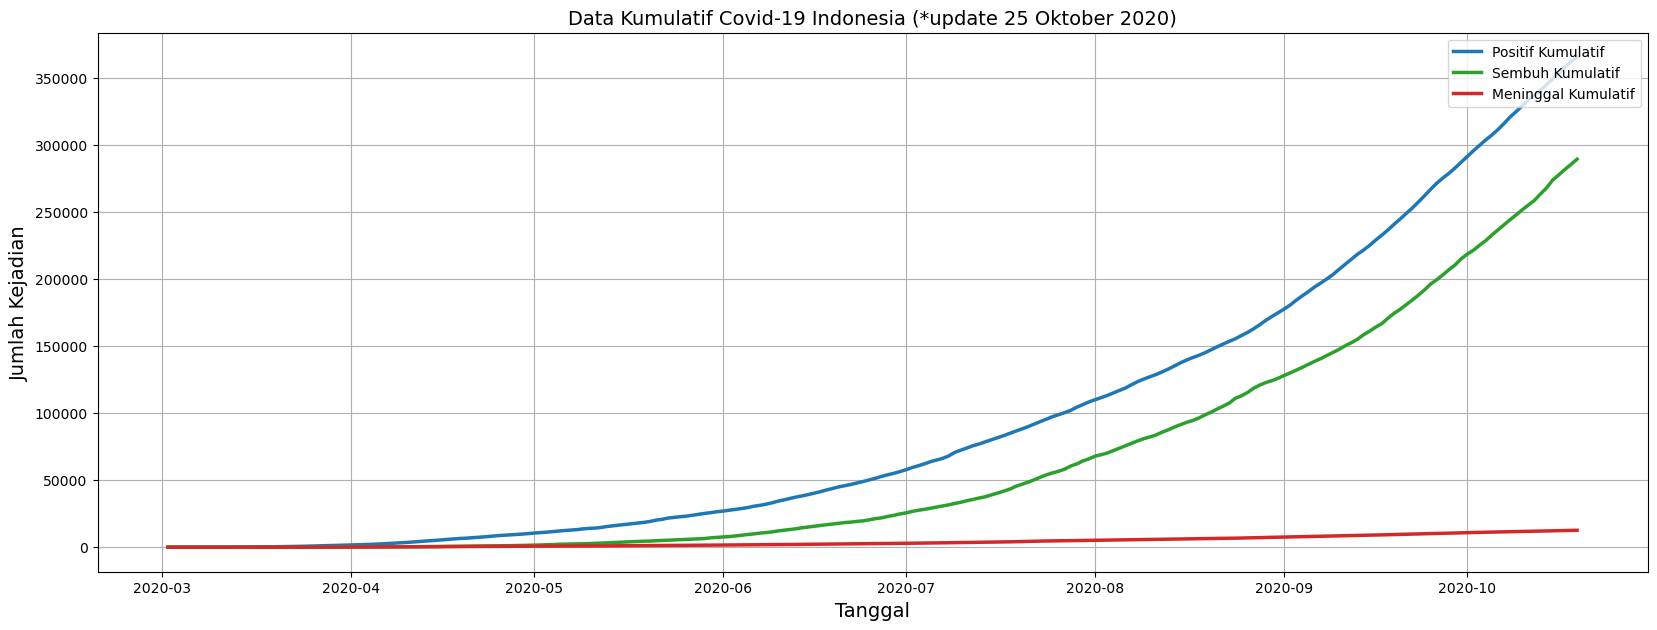

In [11]:
### Membuat plot time series data kumulatif Covid-19

# penetapan parameter
df = df_indo.iloc[:, 0:3] # mengirimkan data "Positif Kumulatif", "Sembuh Kumulatif", "Meninggal Kumulatif"
nm_color = ["blue", "green", "red"]
nm_marker = ""
nm_label = ["Positif Kumulatif", "Sembuh Kumulatif", "Meninggal Kumulatif"]
nm_xlabel = "Tanggal"
nm_ylabel = "Jumlah Kejadian"
nm_title = "Data Kumulatif Covid-19 Indonesia (*update 25 Oktober 2020)"

# Menampilkan plot time serie
visual_time_series(df, nm_color, nm_marker, nm_label, nm_xlabel, nm_ylabel, nm_title)

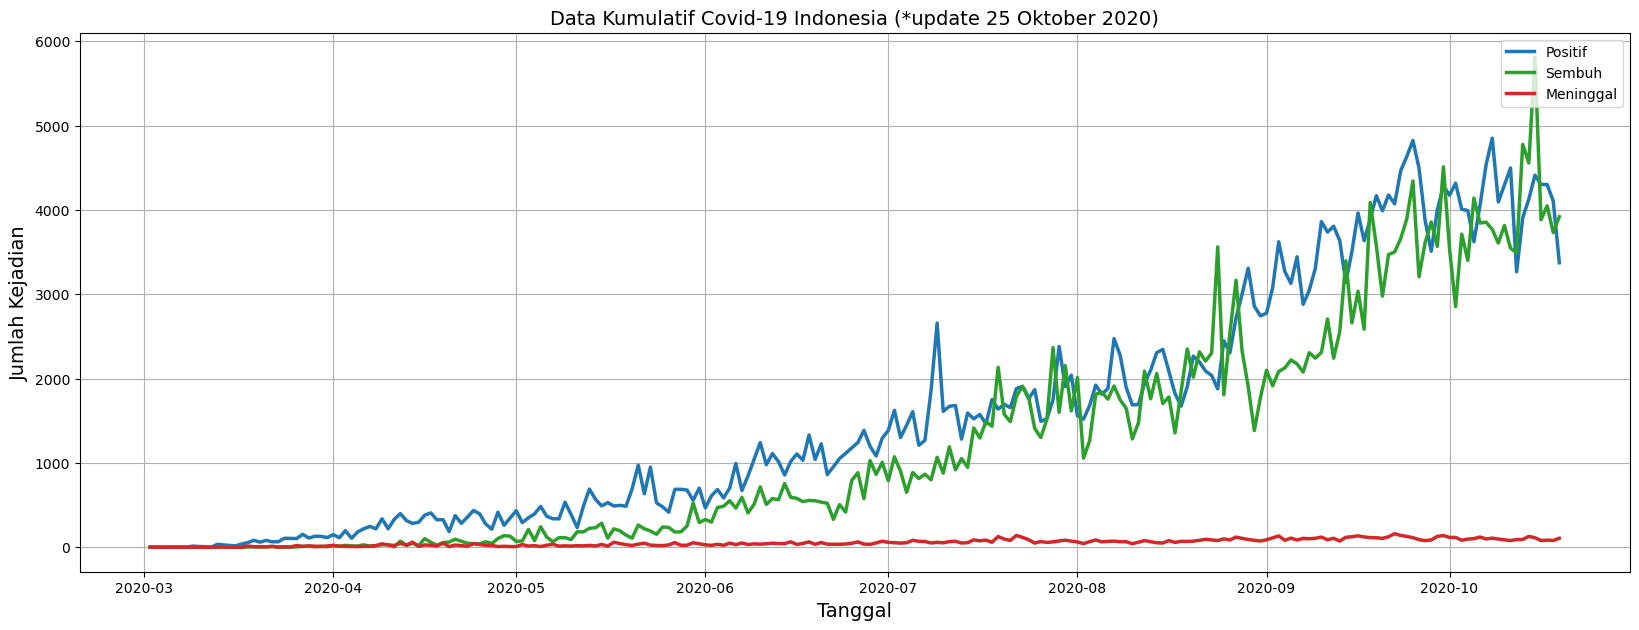

In [12]:
# Membuat plot time series data harian Covid-19

# penetapan parameter
df = df_indo.iloc[:, 3:6]
nm_color = ["blue", "green", "red"]
nm_marker = ""
nm_label = ["Positif", "Sembuh", "Meninggal"]
nm_xlabel = "Tanggal"
nm_ylabel = "Jumlah Kejadian"
nm_title = "Data Kumulatif Covid-19 Indonesia (*update 25 Oktober 2020)"

# Menampilkan plot time serie
visual_time_series(df, nm_color, nm_marker, nm_label, nm_xlabel, nm_ylabel, nm_title)

* Berdasarkan plot tersebut diketahui bahwa Covid-19 sudah hampir selesai. Karena perkembangan jumlah sembuh sudah mendekati jumlah positif.
* Sedangkan kasus meninggal tidak mengalami peningkatan yang tajam

### Bagian 2.3 Visualisasi Data Untuk Melihat Hubungan Antar Variabel

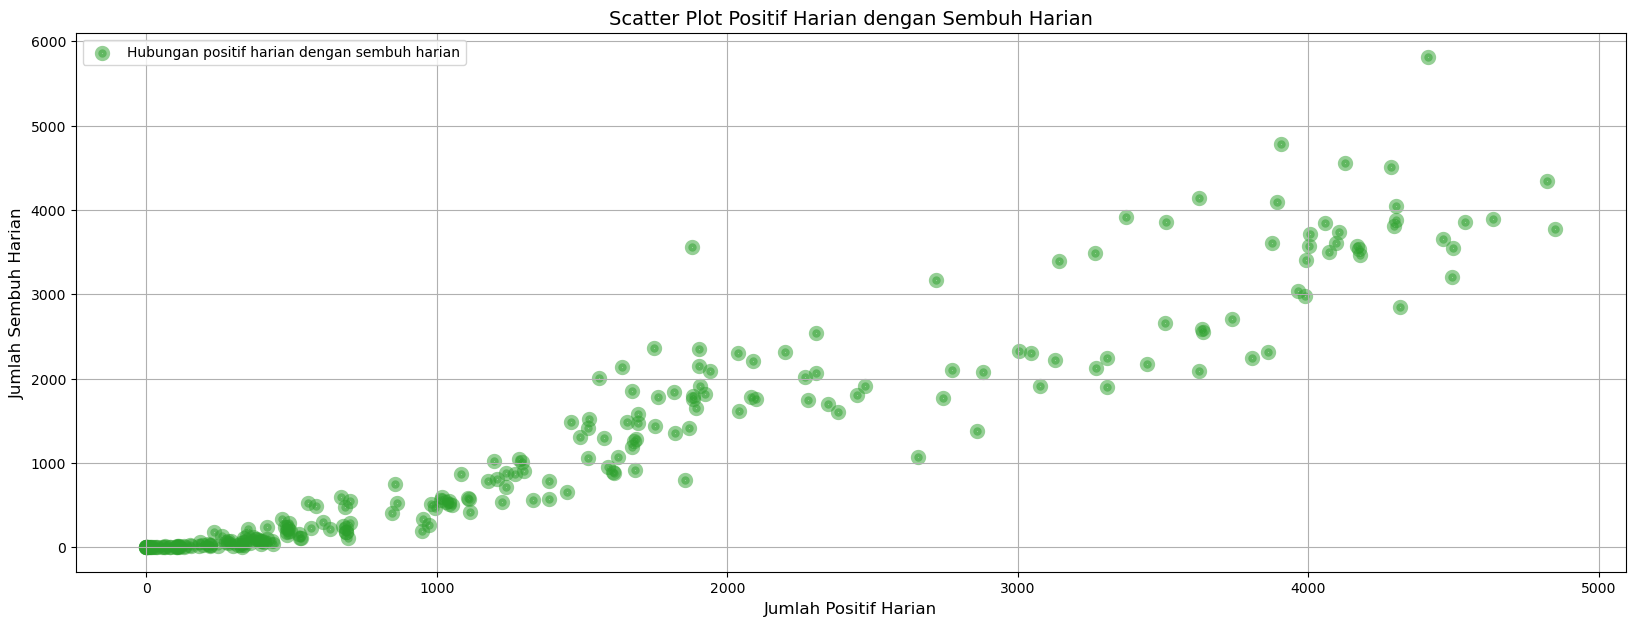

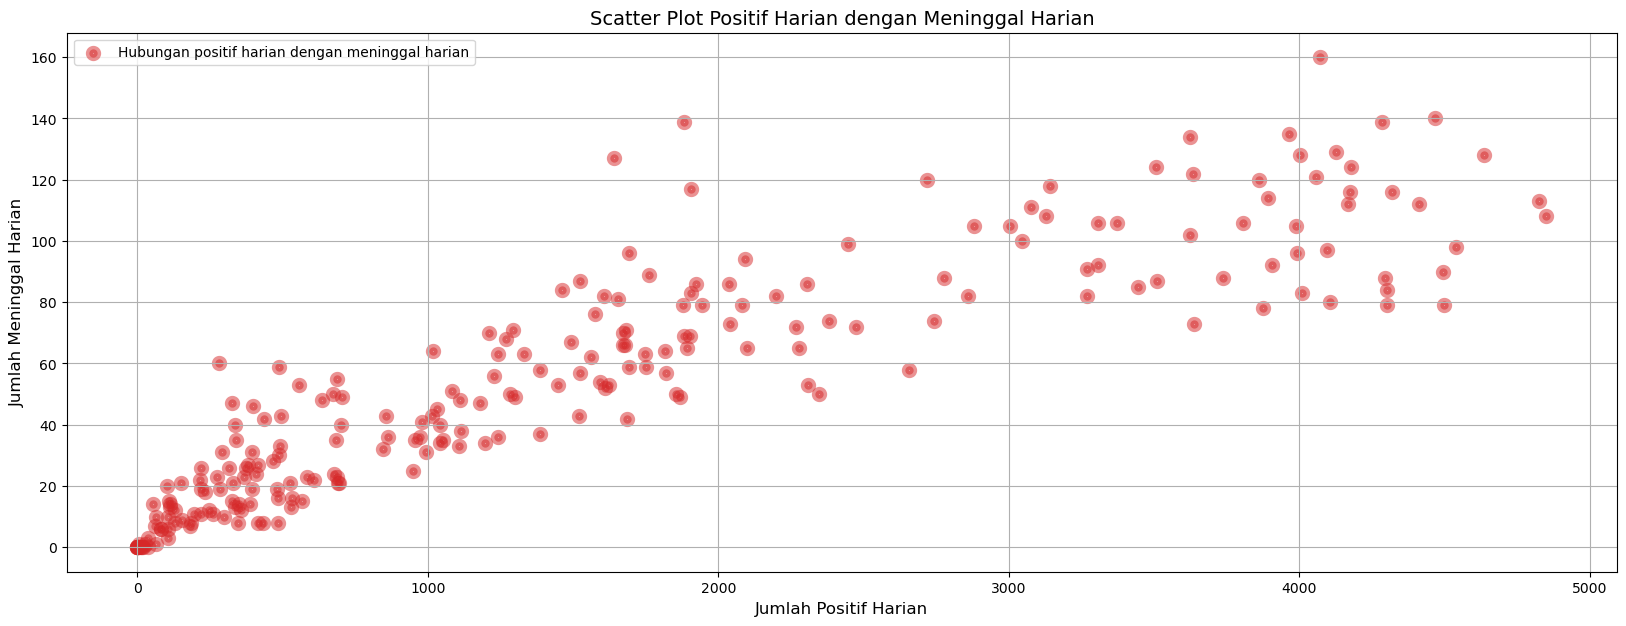

In [13]:
### Membuat Scatter Plot untuk melihat hubungan antara
# menggandakan dataset
df = df_indo.copy()

### => jumlah positif dgn jumlah sembuh
# menetapkan parameter
nilai_x = df["positif_harian"]
nilai_y = df["sembuh_harian"]
nm_color = "green"
nm_label = "Hubungan positif harian dengan sembuh harian"
nm_xlabel = "Jumlah Positif Harian"
nm_ylabel = "Jumlah Sembuh Harian"
nm_title = "Scatter Plot Positif Harian dengan Sembuh Harian"

# memanggil fungsi visual scatter plot
visual_scatter(nilai_x, nilai_y, nm_color, nm_label, nm_xlabel, nm_ylabel, nm_title)


### => jumlah positif dgn jumlah meninggal
# menetapkan parameter
nilai_x = df["positif_harian"]
nilai_y = df["meninggal_harian"]
nm_color = "red"
nm_label = "Hubungan positif harian dengan meninggal harian"
nm_xlabel = "Jumlah Positif Harian"
nm_ylabel = "Jumlah Meninggal Harian"
nm_title = "Scatter Plot Positif Harian dengan Meninggal Harian"

# memanggil fungsi visual scatter plot
visual_scatter(nilai_x, nilai_y, nm_color, nm_label, nm_xlabel, nm_ylabel, nm_title)

## Input dataset time series covid-19 Perprovinsi

In [14]:
from ipynb.fs.full.class_visualisasi import *

In [15]:
# ket. data sudah di pra-proses (seleksi fitur dan reduksi dimensi)
# load dataset
df_prov = covid_provinsi()

# informasi dataset
df_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   provinsi          34 non-null     object
 1   jumlah_positif    34 non-null     int64 
 2   jumlah_sembuh     34 non-null     int64 
 3   jumlah_meninggal  34 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.2+ KB


In [16]:
# membuat persentase positif, sembuh, meninggal
df_prov["persentase_positif"] = round((df_prov["jumlah_positif"] / df_prov["jumlah_positif"].sum()) * 100, 2)
df_prov["persentase_sembuh"] = round((df_prov["jumlah_sembuh"] / df_prov["jumlah_sembuh"].sum()) * 100, 2)
df_prov["persentase_meninggal"] = round((df_prov["jumlah_meninggal"] / df_prov["jumlah_meninggal"].sum()) * 100, 2)

# menampilkan hasilnya
df_prov

,provinsi,jumlah_positif,jumlah_sembuh,jumlah_meninggal,persentase_positif,persentase_sembuh,persentase_meninggal
0,Aceh,6844,5037,238,1.84,1.69,1.85
1,Sumatera Utara,12212,9894,509,3.28,3.33,3.96
2,Sumatera Barat,11652,6410,210,3.13,2.16,1.63
3,Riau,12319,8396,279,3.30,2.82,2.17
4,Jambi,1049,379,21,0.28,0.13,0.16
5,Sumatera Selatan,7328,5522,398,1.97,1.86,3.10
6,Bengkulu,917,727,45,0.25,0.24,0.35
7,Kepulauan Bangka Belitung,191,173,2,0.05,0.06,0.02
8,Lampung,1420,912,54,0.38,0.31,0.42
9,Kepulauan Riau,3012,2361,70,0.81,0.79,0.54


## Bagian 3 Visualisasi Data Covid-19 Di Provinsi
Visualisasi Data Per Provinsi terbagi menjadi:
1. Grouped Barplot positif, sembuh, meninggal berdasarkan provinsi
2. Barplot positif berdasarkan provinsi (Sorting Desc)
3. Barplot sembuh berdasarkan provinsi (Sorting Desc)
4. Barplot meninggal berdasarkan provinsi (Sorting Desc)
5. Pie chart

In [17]:
# order desc untuk kasus positif 
df_positif = df_prov.sort_values("jumlah_positif", ascending=False)
df_positif.head()

,provinsi,jumlah_positif,jumlah_sembuh,jumlah_meninggal,persentase_positif,persentase_sembuh,persentase_meninggal
10,DKI Jakarta,97217,82085,2089,26.08,27.62,16.25
14,Jawa Timur,49801,43671,3606,13.36,14.69,28.06
11,Jawa Barat,31907,21371,616,8.56,7.19,4.79
12,Jawa Tengah,30218,24704,1620,8.11,8.31,12.61
26,Sulawesi Selatan,17690,15322,445,4.75,5.16,3.46


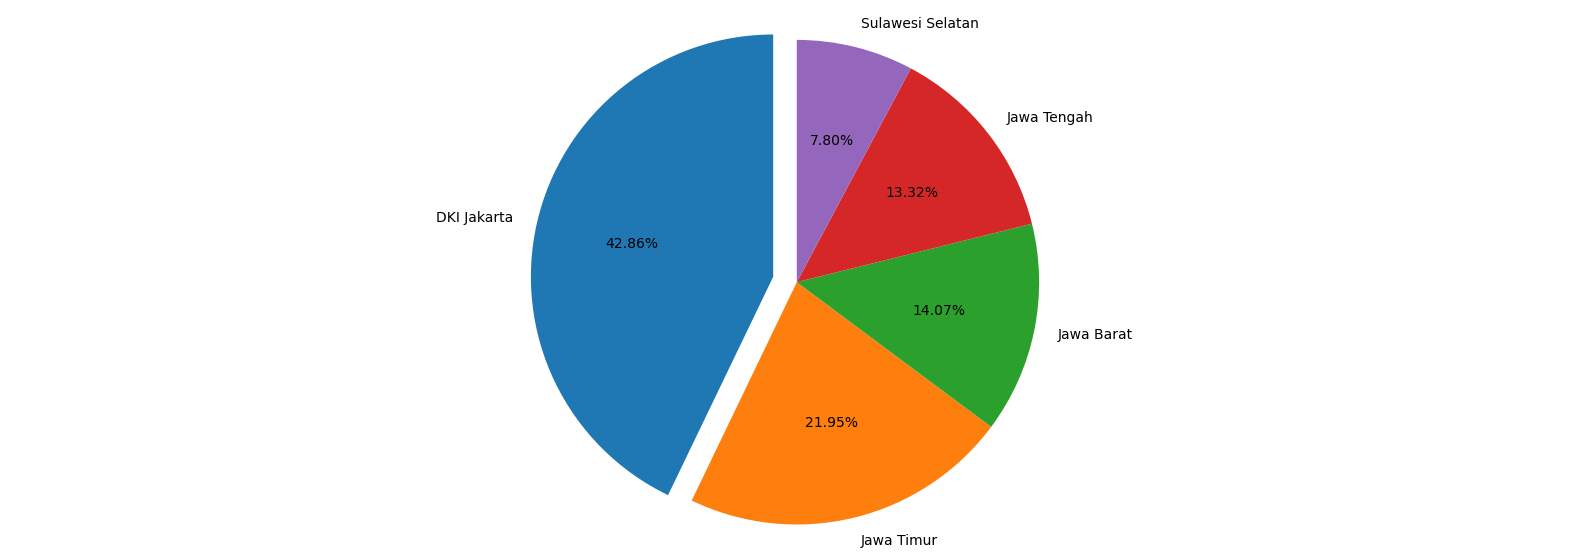

In [18]:
sizes = df_positif["jumlah_positif"].head()
nm_labels = df_positif["provinsi"].head()

visual_pie(sizes, nm_labels)

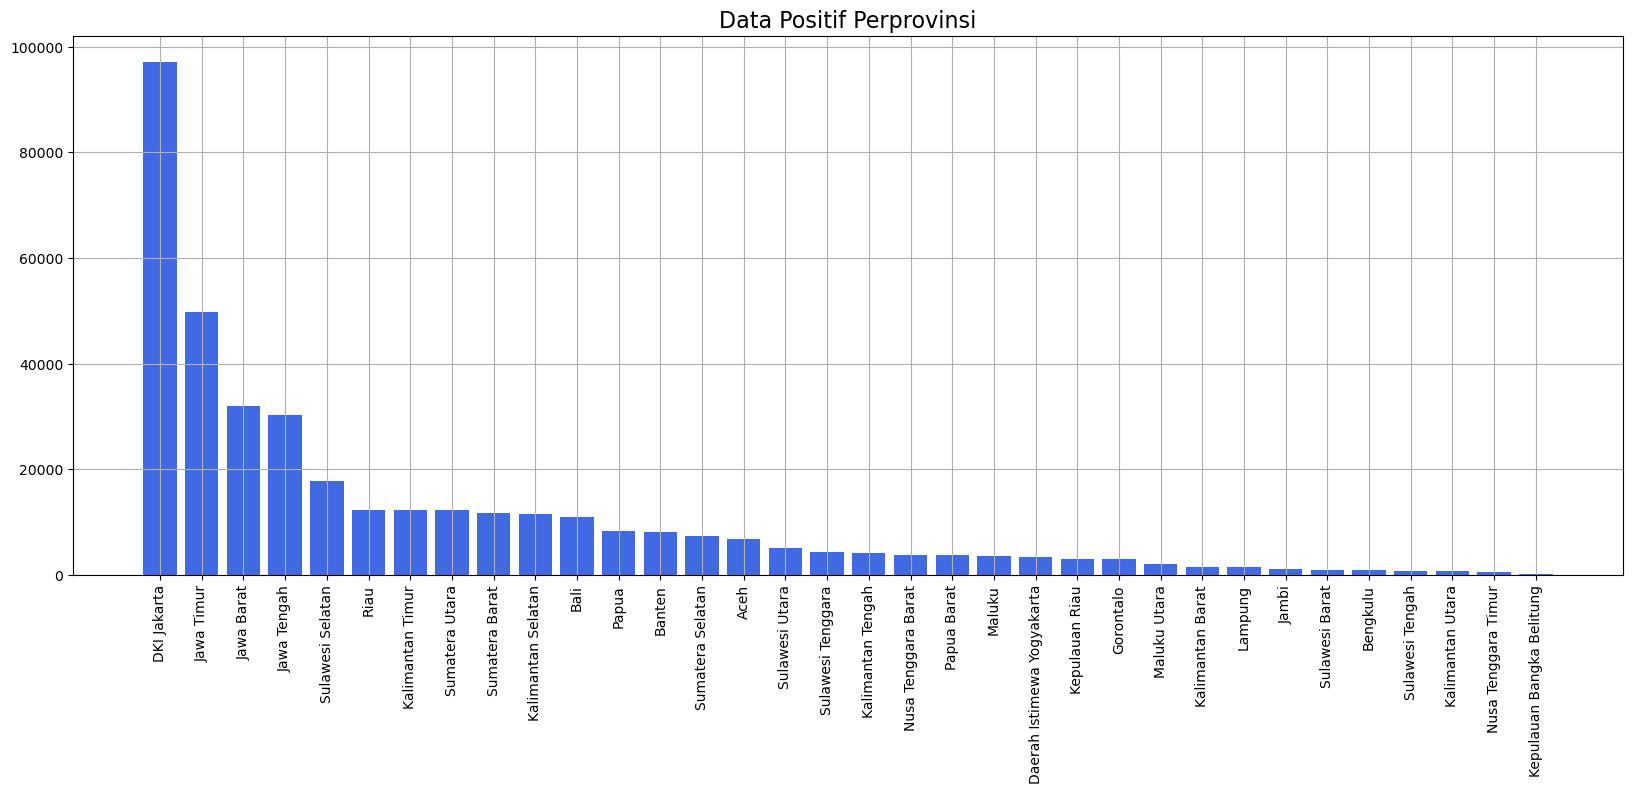

In [19]:
# penetapan parameter
nm_color = "royalblue"
nm_title = "Data Positif Perprovinsi"

# Menampilkan barplot
visual_barplot(df_positif["provinsi"], df_positif["jumlah_positif"], nm_color, nm_title)

In [20]:
# order desc untuk kasus sembuh
df_sembuh = df_prov.sort_values("jumlah_sembuh", ascending=False)
df_sembuh.head()

,provinsi,jumlah_positif,jumlah_sembuh,jumlah_meninggal,persentase_positif,persentase_sembuh,persentase_meninggal
10,DKI Jakarta,97217,82085,2089,26.08,27.62,16.25
14,Jawa Timur,49801,43671,3606,13.36,14.69,28.06
12,Jawa Tengah,30218,24704,1620,8.11,8.31,12.61
11,Jawa Barat,31907,21371,616,8.56,7.19,4.79
26,Sulawesi Selatan,17690,15322,445,4.75,5.16,3.46


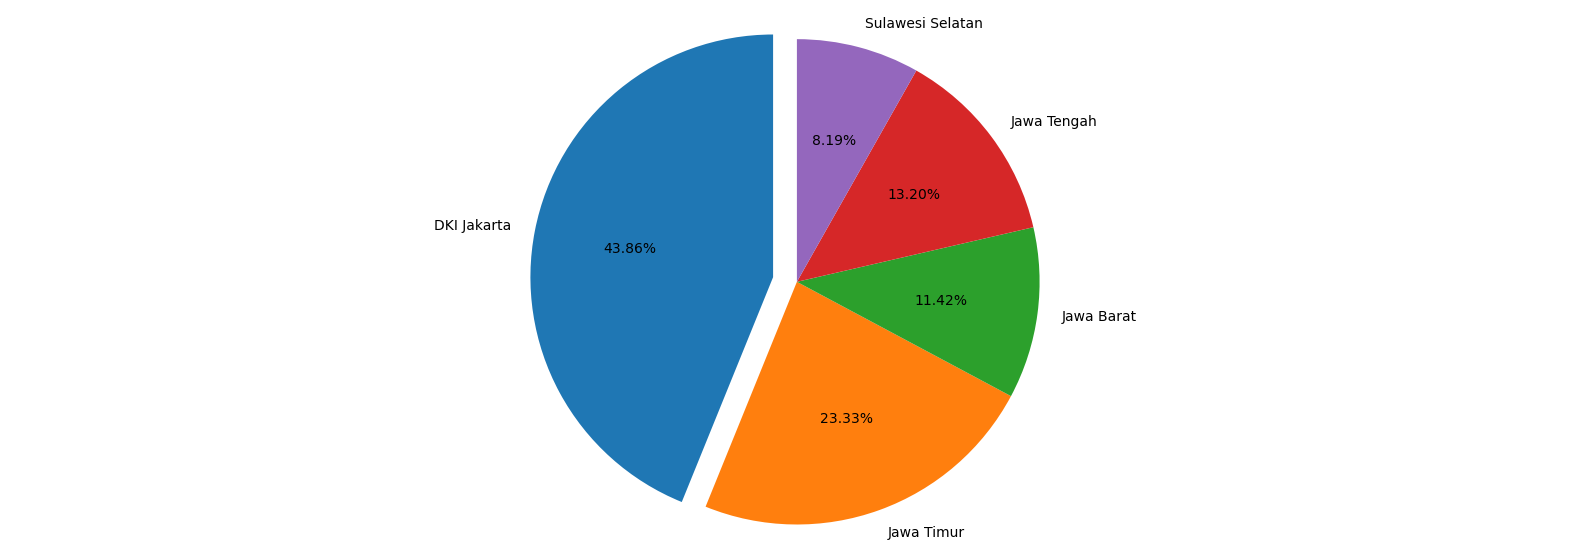

In [21]:
sizes = df_positif["jumlah_sembuh"].head()
nm_labels = df_positif["provinsi"].head()

visual_pie(sizes, nm_labels)

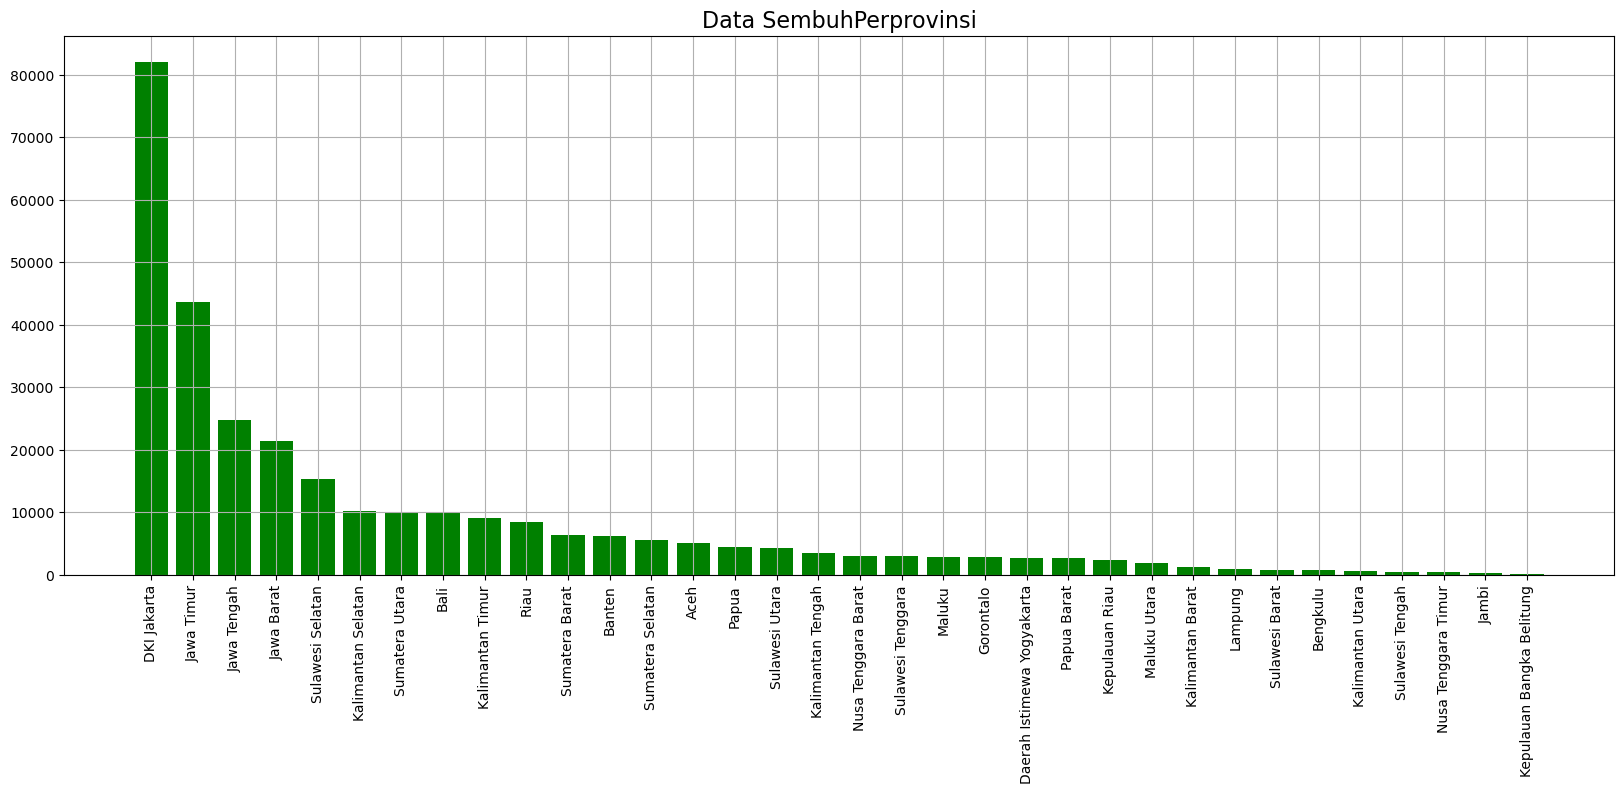

In [22]:
# penetapan parameter
nm_color = "green"
nm_title = "Data SembuhPerprovinsi"

# Menampilkan barplot
visual_barplot(df_sembuh["provinsi"], df_sembuh["jumlah_sembuh"], nm_color, nm_title)

In [23]:
# order desc untuk kasus meninggal
df_meninggal = df_prov.sort_values("jumlah_meninggal", ascending=False)
df_meninggal.head()

,provinsi,jumlah_positif,jumlah_sembuh,jumlah_meninggal,persentase_positif,persentase_sembuh,persentase_meninggal
14,Jawa Timur,49801,43671,3606,13.36,14.69,28.06
10,DKI Jakarta,97217,82085,2089,26.08,27.62,16.25
12,Jawa Tengah,30218,24704,1620,8.11,8.31,12.61
11,Jawa Barat,31907,21371,616,8.56,7.19,4.79
1,Sumatera Utara,12212,9894,509,3.28,3.33,3.96


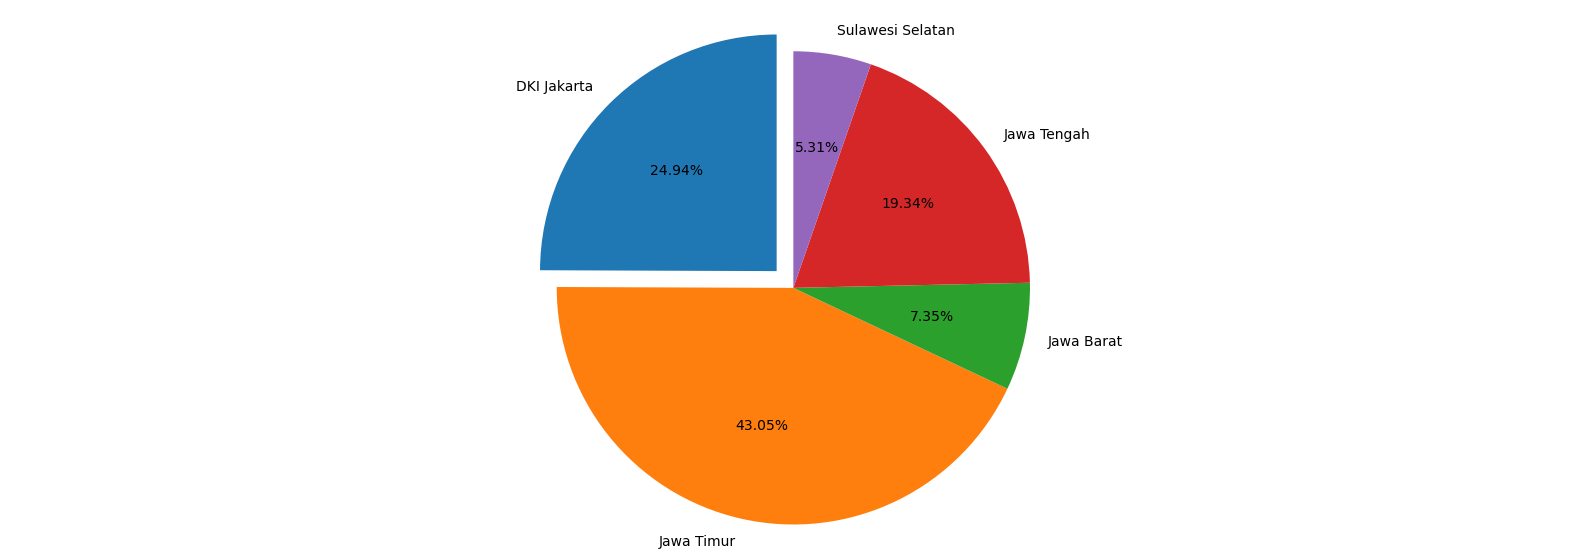

In [24]:
sizes = df_positif["jumlah_meninggal"].head()
nm_labels = df_positif["provinsi"].head()

visual_pie(sizes, nm_labels)

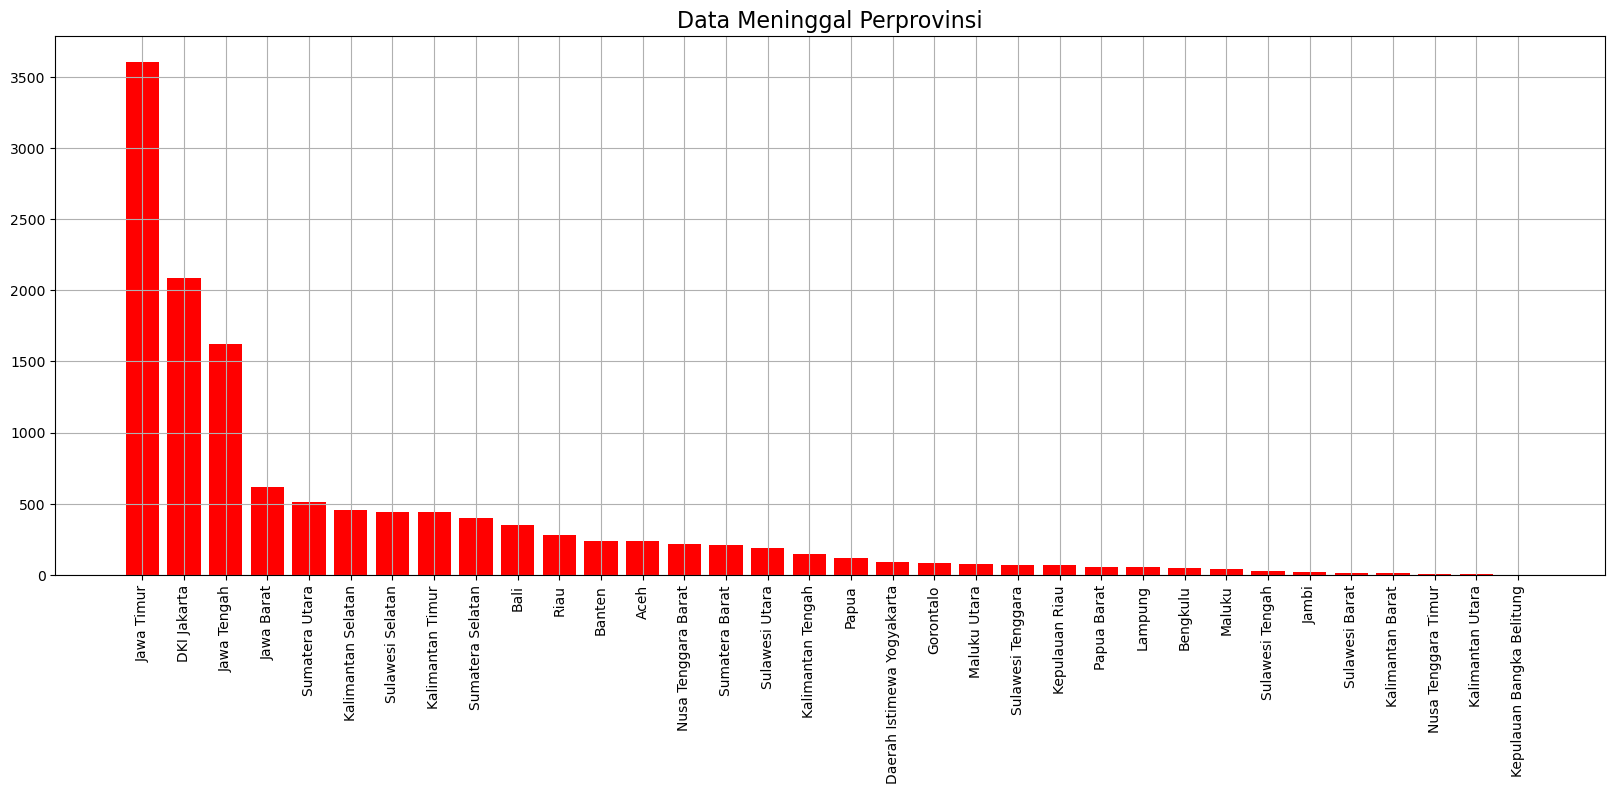

In [25]:
# penetapan parameter
nm_color = "red"
nm_title = "Data Meninggal Perprovinsi"

# Menampilkan barplot
visual_barplot(df_meninggal["provinsi"], df_meninggal["jumlah_meninggal"], nm_color, nm_title)